<a href="https://colab.research.google.com/github/rizkinahayyuni/PCVK_Genap_2022/blob/main/Modul3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRAKTIKUM**

**Transformasi Linier Brightness**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


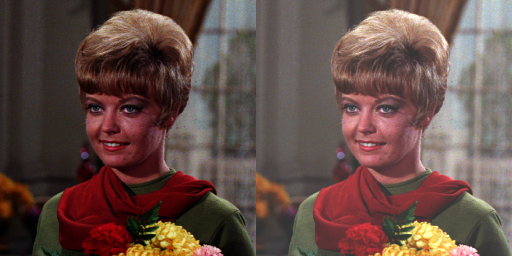

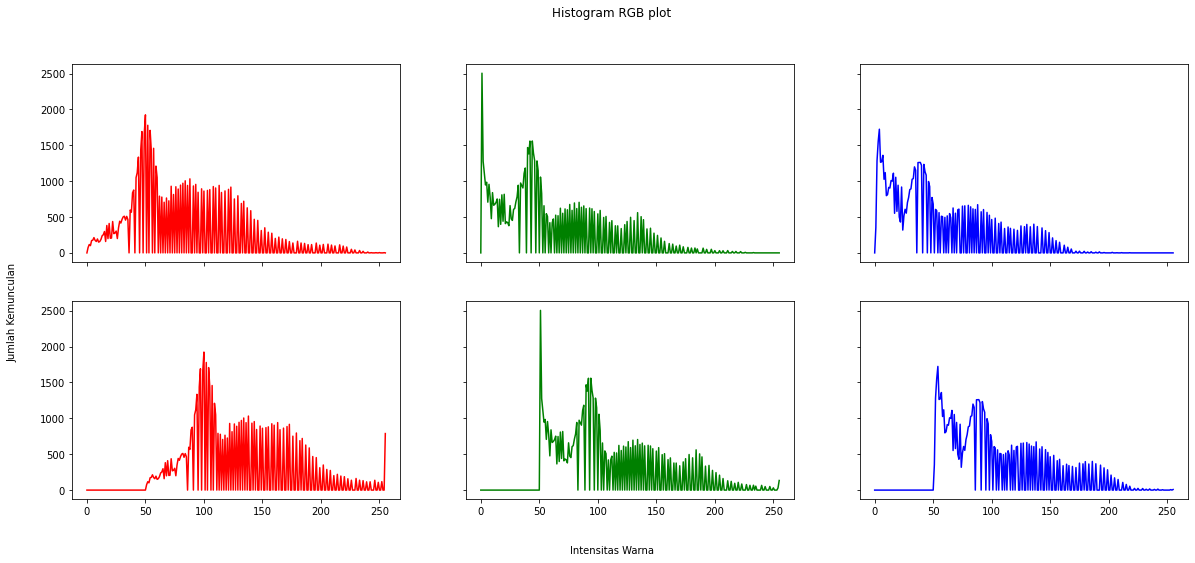

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt


print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')

try :
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/DATA/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# Menghitung histogram citra 
ori_r = cv.calcHist([original],[2],None,[256],[0,256])
ori_g = cv.calcHist([original],[1],None,[256],[0,256])
ori_b = cv.calcHist([original],[0],None,[256],[0,256])
brg_r = cv.calcHist([brightness_image],[2],None,[256],[0,256])
brg_g = cv.calcHist([brightness_image],[1],None,[256],[0,256])
brg_b = cv.calcHist([brightness_image],[0],None,[256],[0,256])

#Menampilkan hasil histogram dalam 1 plot
fig, ax = plt.subplots(2, 3, figsize=[20,8], sharex=True, sharey=True)  # Membuat plot 2baris & 3kolom
fig.suptitle('Histogram RGB plot')                                                      # Menambahkan title dari plot
fig.text(0.08, 0.45, 'Jumlah Kemunculan', va='center', rotation='vertical')      # atribut(x, y, text, text_properties)
fig.text(0.5, 0.03, 'Intensitas Warna', ha='center')                             # atribut(x, y, text, text_properties)
ax[0,0].plot(ori_r, color='red')                    # Membuat plot untuk histogram warna merah
ax[0,1].plot(ori_g, color='green')                  # Membuat plot untuk histogram warna hijau
ax[0,2].plot(ori_b, color='blue')                   # Membuat plot untuk histogram warna biru
ax[1,0].plot(brg_r, color='red')                    # Membuat plot untuk histogram warna merah
ax[1,1].plot(brg_g, color='green')                  # Membuat plot untuk histogram warna hijau
ax[1,2].plot(brg_b, color='blue')                   # Membuat plot untuk histogram warna biru

# **TUGAS**


---


**1. Transformasi Contras**

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukkan tingkat kecerahan [(-255) - 255]: 60
Masukkan kontras [1.0 - 3.0]: 1.5


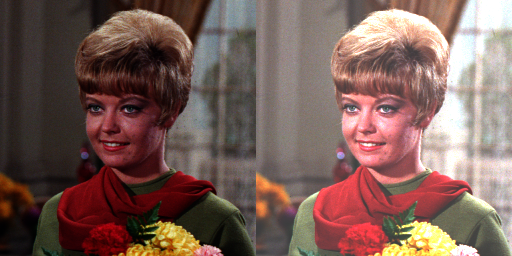

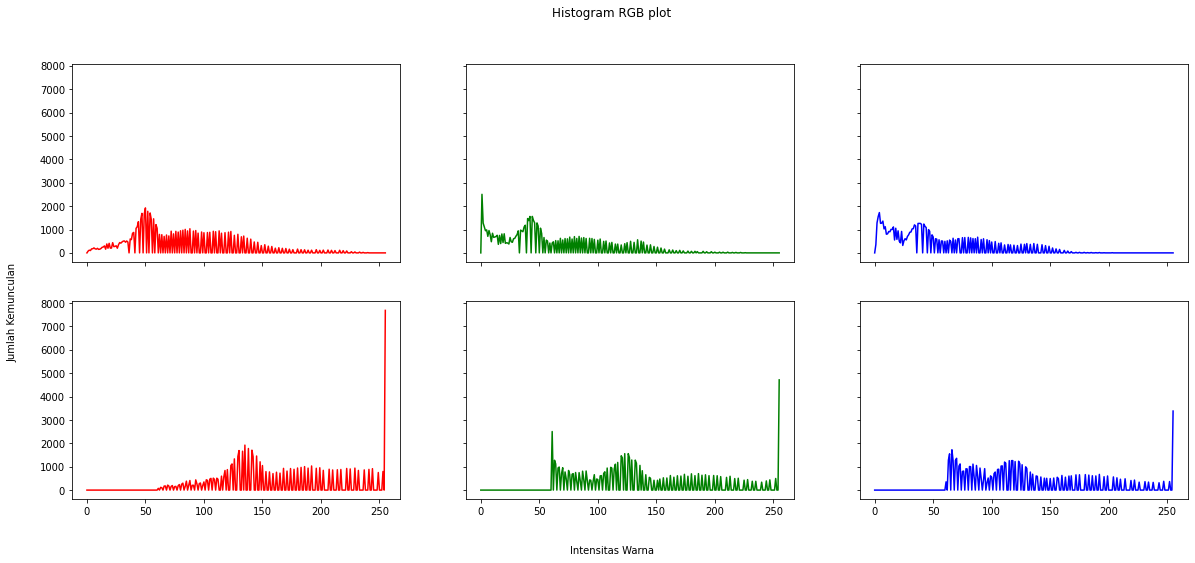

In [4]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')

try :
  brightness = int(input('Masukkan tingkat kecerahan [(-255) - 255]: '))
  contras = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original2 = original
bc_image = np.zeros(original2.shape, original2.dtype)

#akses per piksel
for y in range(original2.shape[0]):
  for x in range(original2.shape[1]):
    for c in range(original2.shape[2]):
      bc_image[y,x,c] = np.clip(contras * original2[y,x,c] + brightness, 0, 255)

final_frame2 = cv.hconcat((original2, bc_image))
cv2_imshow(final_frame2)

# Menghitung histogram citra 
ori2_r = cv.calcHist([original2],[2],None,[256],[0,256])
ori2_g = cv.calcHist([original2],[1],None,[256],[0,256])
ori2_b = cv.calcHist([original2],[0],None,[256],[0,256])
bc_r = cv.calcHist([bc_image],[2],None,[256],[0,256])
bc_g = cv.calcHist([bc_image],[1],None,[256],[0,256])
bc_b = cv.calcHist([bc_image],[0],None,[256],[0,256])

#Menampilkan hasil histogram dalam 1 plot
fig, ax = plt.subplots(2, 3, figsize=[20,8], sharex=True, sharey=True)  # Membuat plot 2baris & 3kolom
fig.suptitle('Histogram RGB plot')                                                      # Menambahkan title dari plot
fig.text(0.08, 0.45, 'Jumlah Kemunculan', va='center', rotation='vertical')      # atribut(x, y, text, text_properties)
fig.text(0.5, 0.03, 'Intensitas Warna', ha='center')                             # atribut(x, y, text, text_properties)
ax[0,0].plot(ori2_r, color='red')                    # Membuat plot untuk histogram warna merah
ax[0,1].plot(ori2_g, color='green')                  # Membuat plot untuk histogram warna hijau
ax[0,2].plot(ori2_b, color='blue')                   # Membuat plot untuk histogram warna biru
ax[1,0].plot(bc_r, color='red')                    # Membuat plot untuk histogram warna merah
ax[1,1].plot(bc_g, color='green')                  # Membuat plot untuk histogram warna hijau
ax[1,2].plot(bc_b, color='blue')                   # Membuat plot untuk histogram warna biru

**2. Transformasi Logarithmic Brightness**

Mengubah tingkat kecerahan citra dengan Transformasi Log 
---------------------------------------------------------
Masukkan nilai kecerahan: 40


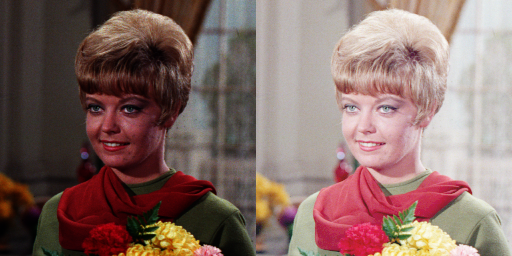

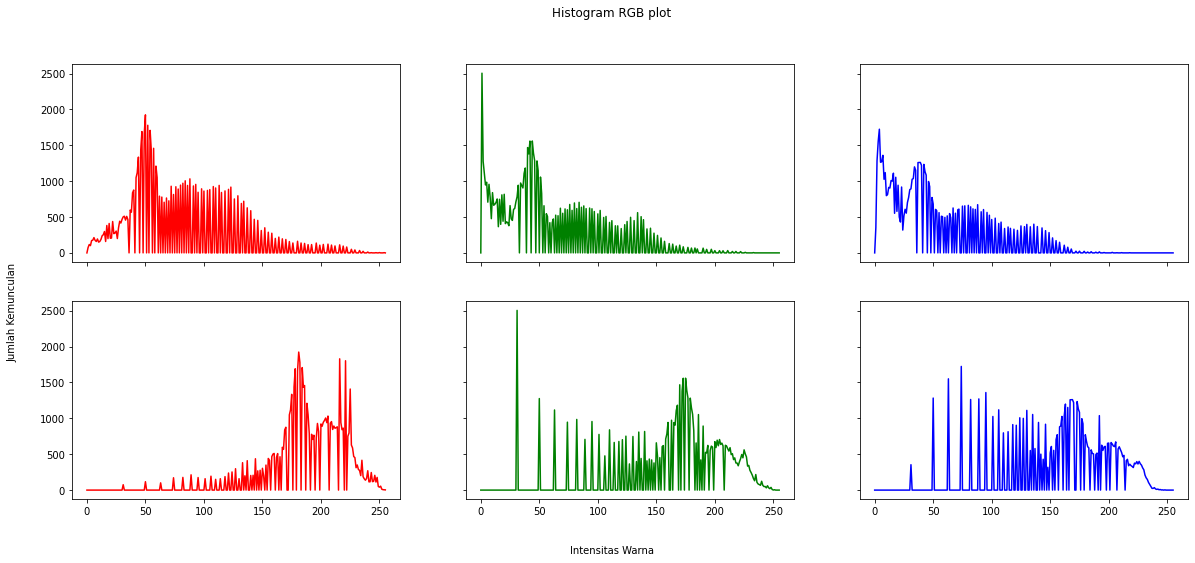

In [5]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('---------------------------------------------------------')

try :
  brightness3 = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original3 = original

c = 255/(np.log(1 + np.max(original3)))
log_transformed = c * np.log(1 + original3)

log_transformed = np.array(log_transformed, dtype = np.uint8)

final_frame3 = cv.hconcat((original3, log_transformed))
cv2_imshow(final_frame3)

# Menghitung histogram citra 
ori3_r = cv.calcHist([original3],[2],None,[256],[0,256])
ori3_g = cv.calcHist([original3],[1],None,[256],[0,256])
ori3_b = cv.calcHist([original3],[0],None,[256],[0,256])
lt_r = cv.calcHist([log_transformed],[2],None,[256],[0,256])
lt_g = cv.calcHist([log_transformed],[1],None,[256],[0,256])
lt_b = cv.calcHist([log_transformed],[0],None,[256],[0,256])

#Menampilkan hasil histogram dalam 1 plot
fig, ax = plt.subplots(2, 3, figsize=[20,8], sharex=True, sharey=True)  # Membuat plot 2baris & 3kolom
fig.suptitle('Histogram RGB plot')                                                      # Menambahkan title dari plot
fig.text(0.08, 0.45, 'Jumlah Kemunculan', va='center', rotation='vertical')      # atribut(x, y, text, text_properties)
fig.text(0.5, 0.03, 'Intensitas Warna', ha='center')                             # atribut(x, y, text, text_properties)
ax[0,0].plot(ori3_r, color='red')                    # Membuat plot untuk histogram warna merah
ax[0,1].plot(ori3_g, color='green')                  # Membuat plot untuk histogram warna hijau
ax[0,2].plot(ori3_b, color='blue')                   # Membuat plot untuk histogram warna biru
ax[1,0].plot(lt_r, color='red')                    # Membuat plot untuk histogram warna merah
ax[1,1].plot(lt_g, color='green')                  # Membuat plot untuk histogram warna hijau
ax[1,2].plot(lt_b, color='blue')                   # Membuat plot untuk histogram warna biru

**3.a. Transformasi Grayscale Metode Averaging**

(0.0, 256.0)

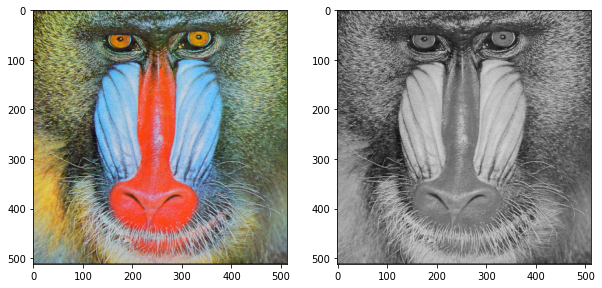

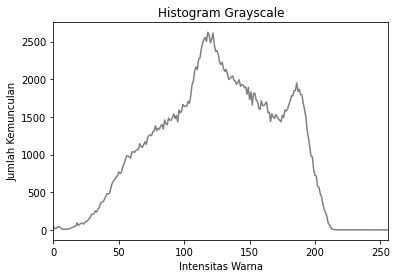

In [10]:
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/DATA/mandrill.tiff')
imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
av_grey = imgRGB.copy()
av_grey[:] = np.sum(av_grey,axis=-1,keepdims=1)/3

fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)
plt.imshow(imgRGB)
fig.add_subplot(1, 2, 2)
plt.imshow(av_grey)

# Menampilkan Histogram
av_g = cv.calcHist([av_grey],[0],None,[256],[0,256])
plt.figure()
plt.title("Histogram Grayscale")
plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")
plt.plot(av_g, color='grey')
plt.xlim([0, 256])

**3.b. Transformasi Grayscale Metode Lightness**

(0.0, 256.0)

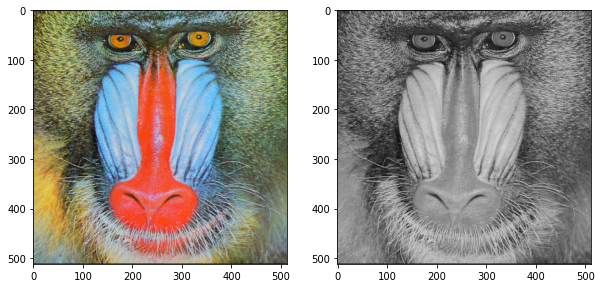

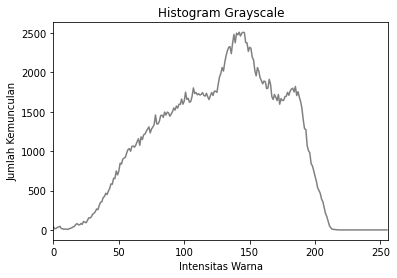

In [11]:
light_gray = imgRGB.copy()
light_gray[:] = np.max(light_gray,axis=-1,keepdims=1)/2 + np.min(light_gray,axis=-1,keepdims=1)/2

fig2 = plt.figure(figsize=(10, 7))
fig2.add_subplot(1, 2, 1)
plt.imshow(imgRGB)
fig2.add_subplot(1, 2, 2)
plt.imshow(light_gray)

# Menampilkan Histogram
lg_g = cv.calcHist([light_gray],[0],None,[256],[0,256])
plt.figure()
plt.title("Histogram Grayscale")
plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")
plt.plot(lg_g, color='grey')
plt.xlim([0, 256])

**3.c. Transformasi Grayscale Metode Luminance**

(0.0, 256.0)

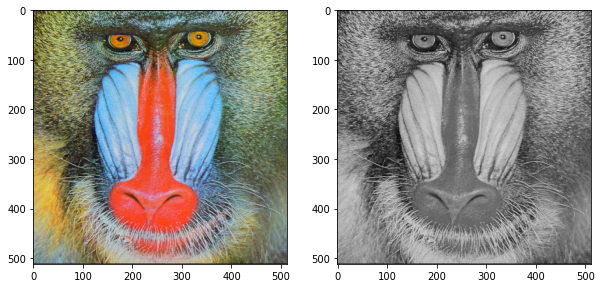

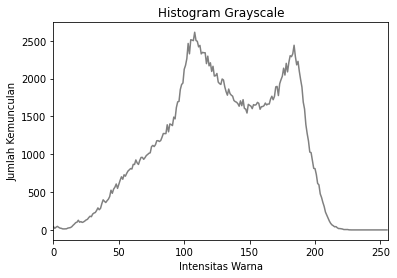

In [12]:
lg_img = imgRGB.copy()
luminosity_constant = [0.21,0.72,0.07]
L_mean = np.tensordot(lg_img,luminosity_constant, axes=((-1,-1)))[...,None]
lg_img[:] = L_mean.astype(lg_img.dtype)

fig2 = plt.figure(figsize=(10, 7))
fig2.add_subplot(1, 2, 1)
plt.imshow(imgRGB)
fig2.add_subplot(1, 2, 2)
plt.imshow(lg_img)

# Menampilkan Histogram
lg = cv.calcHist([lg_img],[0],None,[256],[0,256])
plt.figure()
plt.title("Histogram Grayscale")
plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")
plt.plot(lg, color='grey')
plt.xlim([0, 256])

**4. Menampilkan warna tertentu, dan ubah warna lain menjadi grayscale**

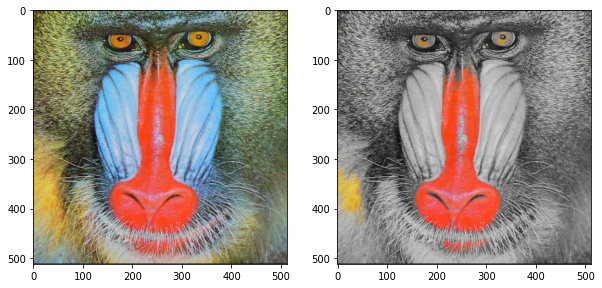

In [ ]:
r_img = imgRGB.copy()

ret, mask = cv.threshold(r_img[:, :,0], 210, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(r_img)
mask3[:, :, 0] = mask
mask3[:, :, 1] = mask
mask3[:, :, 2] = mask

# extracting `red` region using `bitwise_and`
red = cv.bitwise_and(r_img, mask3)

gray = cv.cvtColor(r_img, cv.COLOR_RGB2GRAY)
r_img  = cv.cvtColor(gray, cv.COLOR_GRAY2RGB)

# extracting non-red region
gray = cv.bitwise_and(r_img, 255 - mask3)

# red masked output
out = gray + red

fig2 = plt.figure(figsize=(10, 7))
fig2.add_subplot(1, 2, 1)
plt.imshow(imgRGB)
fig2.add_subplot(1, 2, 2)
plt.imshow(out)

**SUMBER BAHAN AJAR**
1. https://numpy.org/devdocs/reference/generated/numpy.zeros.html
2. https://numpy.org/doc/stable/reference/generated/numpy.clip.html
3. https://www.geeksforgeeks.org/python-intensity-transformation-operations-on-images/
4. https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html
5. https://www.geeksforgeeks.org/how-to-display-multiple-images-in-one-figure-correctly-inmatplotlib/
6. https://muthu.co/converting-color-images-to-grayscale-using-numpy-and-some-mathematics/
7. https://numpy.org/doc/stable/reference/generated/numpy.sum.html
8. https://numpy.org/doc/stable/reference/generated/numpy.tensordot.html
9. https://do-marlay-ka-moonh.medium.com/converting-color-images-to-grayscaleab0120ea2c1e
10. https://www.inpows.com/python/mengubah-citra-rgb-menjadi-citra-grayscale-di-python/


**LAPORAN**

Setiap penjelasan baris kode saya sertakan dalam laporan.

https://drive.google.com/file/d/1L4wo1I4gI2fSLOog37RFW9HSyYlbUQQ2/view?usp=sharing